In [74]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(car)
library(corrplot)
library(brms)
library(rstan)  
library(readxl)
# Load packages
library(glmnet)
library(copula)


In [75]:
data <- read.table('C:\\Users\\roryq\\Downloads\\Wines.txt', header = TRUE, sep = ",")  # Change sep as needed (e.g., "," for CSV)
head(data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,5


In [76]:
str(data)

'data.frame':	1143 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 6.7 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.58 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.08 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 1.8 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.097 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 15 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 65 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.28 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.54 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 9.2 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ Id                  : int  0 1 2 3 4 5 6 7 8 10 ...


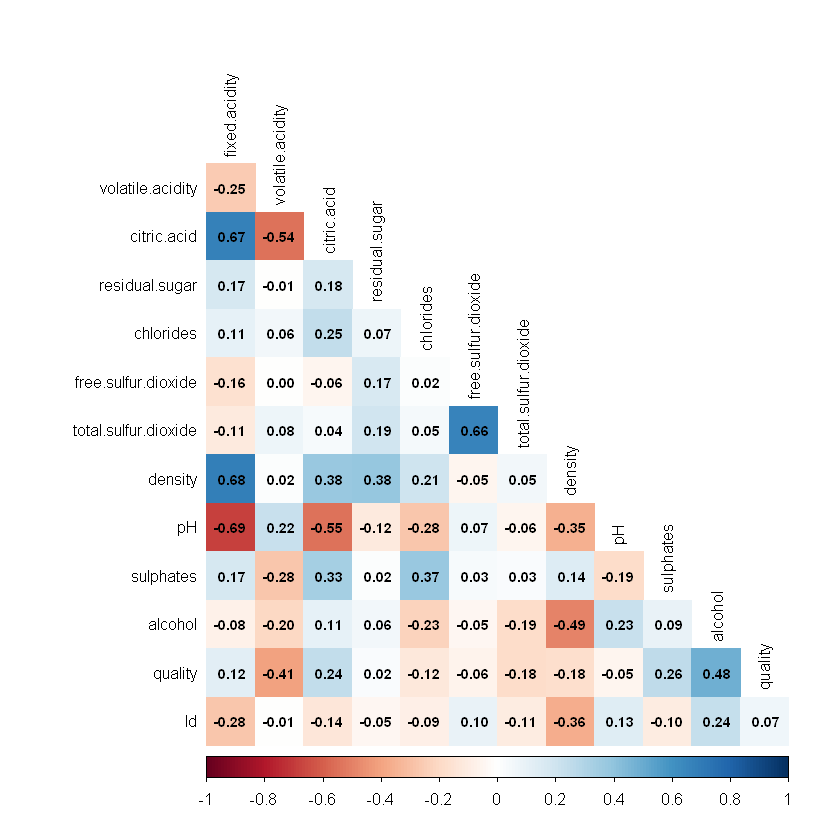

In [77]:
library(corrplot)

# Compute correlation matrix of numeric columns
corr_matrix <- cor(data[sapply(data, is.numeric)], use = "complete.obs")

# Enhanced correlation plot with black fonts
corrplot(corr_matrix, method = "color", 
         addCoef.col = "black",    # Correlation coefficient color
         tl.col = "black",         # Text label color
         tl.cex = 0.8,             # Label size
         number.cex = 0.7,         # Coefficient text size
         type = "lower",           # Lower triangle only
         diag = FALSE)             # Hide diagonal


In [78]:
corr_matrix

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Id
fixed.acidity,1.00000000,-0.250728322,0.67315725,0.171830535,0.10788857,-0.164830793,-0.11062837,0.68150088,-0.68516260,0.17459183,-0.07505485,0.12197010,-0.27582627
volatile.acidity,-0.25072832,1.000000000,-0.54418694,-0.005751097,0.05633626,-0.001962479,0.07774772,0.01651152,0.22149152,-0.27607860,-0.20390927,-0.40739351,-0.00789157
citric.acid,0.67315725,-0.544186937,1.00000000,0.175814854,0.24531249,-0.057589104,0.03687111,0.37524326,-0.54633914,0.33123176,0.10625034,0.24082084,-0.13901077
residual.sugar,0.17183054,-0.005751097,0.17581485,1.000000000,0.07086311,0.165338797,0.19079003,0.38014695,-0.11695894,0.01747450,0.05842061,0.02200193,-0.04634440
chlorides,0.10788857,0.056336259,0.24531249,0.070863112,1.00000000,0.015280458,0.04816316,0.20890071,-0.27775907,0.37478389,-0.22991709,-0.12408453,-0.08809907
free.sulfur.dioxide,-0.16483079,-0.001962479,-0.05758910,0.165338797,0.01528046,1.000000000,0.66109287,-0.05415032,0.07280371,0.03444512,-0.04709483,-0.06325964,0.09526757
total.sulfur.dioxide,-0.11062837,0.077747722,0.03687111,0.190790035,0.04816316,0.661092872,1.00000000,0.05017483,-0.05912572,0.02689368,-0.18816480,-0.18333915,-0.10738941
density,0.68150088,0.016511520,0.37524326,0.380146952,0.20890071,-0.054150318,0.05017483,1.00000000,-0.35277462,0.14313929,-0.49472690,-0.17520792,-0.36392568
pH,-0.68516260,0.221491518,-0.54633914,-0.116958936,-0.27775907,0.072803706,-0.05912572,-0.35277462,1.00000000,-0.18549903,0.22532220,-0.05245303,0.13290421
sulphates,0.17459183,-0.276078597,0.33123176,0.017474504,0.37478389,0.034445122,0.02689368,0.14313929,-0.18549903,1.00000000,0.09442113,0.25771026,-0.10395366


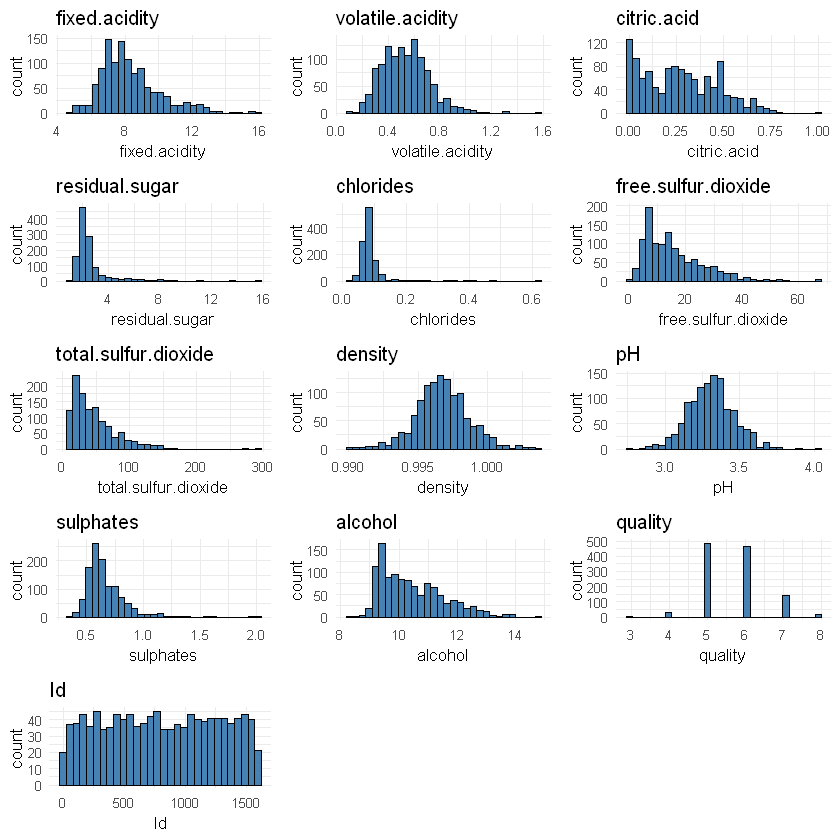

In [79]:
# Load required libraries
library(ggplot2)
library(gridExtra)

# Select numeric columns only
numeric_vars <- data[, sapply(data, is.numeric)]

# Create a list of ggplot histogram objects
plot_list <- lapply(names(numeric_vars), function(var) {
  ggplot(data, aes_string(x = var)) +
    geom_histogram(fill = "steelblue", color = "black", bins = 30) +
    ggtitle(var) +
    theme_minimal(base_size = 10)
})

# Display plots in a grid (adjust ncol/nrow as needed)
do.call(grid.arrange, c(plot_list, ncol = 3))


In [80]:
# Fit your OLS model
model <- lm(quality ~ ., data = data)

# Check Variance Inflation Factors
print(vif(model))

       fixed.acidity     volatile.acidity          citric.acid 
            7.930042             1.779962             3.233412 
      residual.sugar            chlorides  free.sulfur.dioxide 
            1.744487             1.539453             1.987134 
total.sulfur.dioxide              density                   pH 
            2.216224             6.614473             3.440539 
           sulphates              alcohol                   Id 
            1.450501             3.211699             1.254879 


In [81]:
# Create binary outcome: 1 if quality is 7 or 8, else 0
data$high_quality <- ifelse(data$quality %in% c(7, 8), 1, 0)

In [82]:

library(stargazer)
glm_model <- glm(high_quality ~ . - quality - Id, data = data, family = binomial())
stargazer(glm_model)




% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Mon, Apr 14, 2025 - 1:27:15 PM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{1}{c}{\textit{Dependent variable:}} \\ 
\cline{2-2} 
\\[-1.8ex] & high\_quality \\ 
\hline \\[-1.8ex] 
 fixed.acidity & 0.179 \\ 
  & (0.147) \\ 
  & \\ 
 volatile.acidity & $-$2.912$^{***}$ \\ 
  & (0.942) \\ 
  & \\ 
 citric.acid & 1.757$^{*}$ \\ 
  & (0.980) \\ 
  & \\ 
 residual.sugar & 0.225$^{**}$ \\ 
  & (0.093) \\ 
  & \\ 
 chlorides & $-$11.005$^{***}$ \\ 
  & (4.232) \\ 
  & \\ 
 free.sulfur.dioxide & 0.007 \\ 
  & (0.014) \\ 
  & \\ 
 total.sulfur.dioxide & $-$0.012$^{**}$ \\ 
  & (0.005) \\ 
  & \\ 
 density & $-$264.397$^{**}$ \\ 
  & (132.476) \\ 
  & \\ 
 pH & $-$0.497 \\ 
  & (1.212) \\ 
  & \\ 
 sulphates & 3.370$^{***}$ \\ 
  & (0.631) \\ 
  & \\ 
 alcohol & 

In [83]:
library(kableExtra)

# Compute VIF
vif_vals <- vif(glm_model)

# Convert to data frame
vif_df <- data.frame(
  Predictor = names(vif_vals),
  VIF = round(vif_vals, 2)
)

# Display as a clean markdown table
kable(vif_df, caption = "Variance Inflation Factors (VIF) for Logistic Regression Model")

<table>
<caption>Variance Inflation Factors (VIF) for Logistic Regression Model</caption>
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:left;"> Predictor </th>
   <th style="text-align:right;"> VIF </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> fixed.acidity </td>
   <td style="text-align:left;"> fixed.acidity </td>
   <td style="text-align:right;"> 8.53 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> volatile.acidity </td>
   <td style="text-align:left;"> volatile.acidity </td>
   <td style="text-align:right;"> 1.68 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> citric.acid </td>
   <td style="text-align:left;"> citric.acid </td>
   <td style="text-align:right;"> 3.27 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> residual.sugar </td>
   <td style="text-align:left;"> residual.sugar </td>
   <td style="text-align:right;"> 1.79 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> chlorides </td>
   <td sty

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.8883

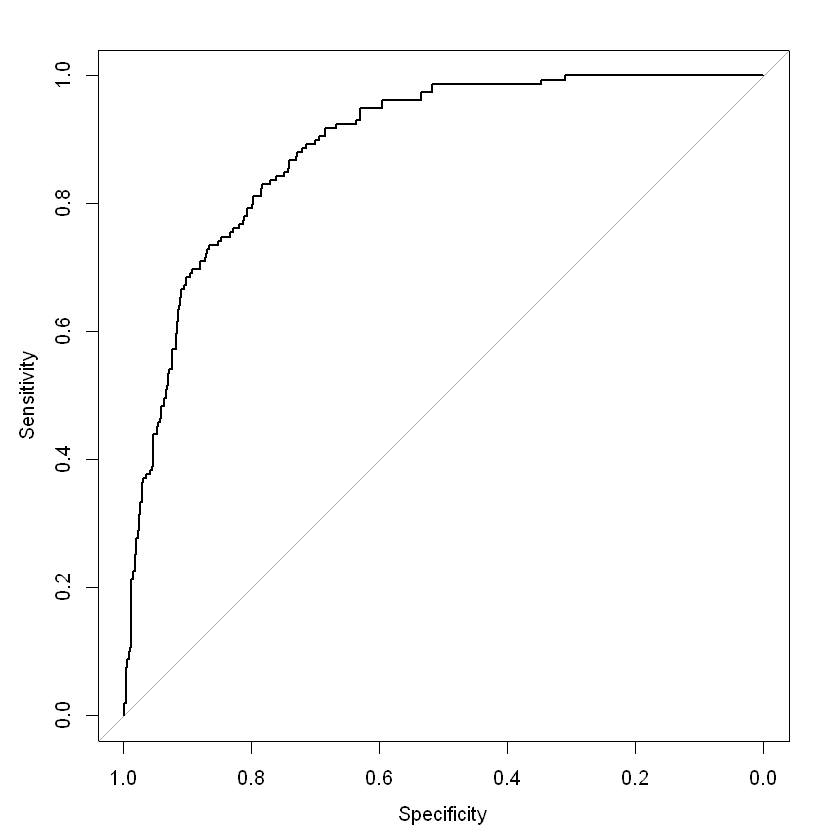

In [84]:
library(pROC)
preds <- predict(glm_model, type = "response")
roc_obj <- roc(data$high_quality, preds)
plot(roc_obj)
auc(roc_obj)


In [85]:
# Step 1: Get predicted probabilities
preds <- predict(glm_model, type = "response")

# Step 2: Apply classification threshold (e.g., 0.5)
threshold <- 0.5
predicted_class <- ifelse(preds > threshold, 1, 0)

# Step 3: Generate confusion matrix
conf_matrix <- table(Predicted = predicted_class, Actual = data$high_quality)
print(conf_matrix)


         Actual
Predicted   0   1
        0 950  99
        1  34  60


In [86]:
TP <- conf_matrix["1", "1"]
TN <- conf_matrix["0", "0"]
FP <- conf_matrix["1", "0"]
FN <- conf_matrix["0", "1"]

accuracy <- (TP + TN) / sum(conf_matrix)
sensitivity <- TP / (TP + FN)
specificity <- TN / (TN + FP)

cat("Accuracy:", round(accuracy, 3), "\n")
cat("Sensitivity (Recall):", round(sensitivity, 3), "\n")
cat("Specificity:", round(specificity, 3), "\n")


Accuracy: 0.884 
Sensitivity (Recall): 0.377 
Specificity: 0.965 


# Adjust for vif in logistic model

In [87]:
# Convert categorical variables to dummy variables and drop intercept
x <- model.matrix(high_quality ~ . - quality - Id, data = data)[, -1]
y <- data$high_quality


In [88]:
set.seed(123)  # for reproducibility
cvfit <- cv.glmnet(x, y, family = "binomial", alpha = 1)


In [89]:
# Best lambda that minimizes cross-validated error
cvfit$lambda.min

# LASSO coefficients at best lambda
coef(cvfit, s = "lambda.min")


[1] 0.002330265

12 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)           1.534647e+02
fixed.acidity         9.715714e-02
volatile.acidity     -3.101885e+00
citric.acid           1.518951e+00
residual.sugar        1.521993e-01
chlorides            -9.022340e+00
free.sulfur.dioxide   .           
total.sulfur.dioxide -9.015337e-03
density              -1.627287e+02
pH                   -7.304847e-01
sulphates             2.978770e+00
alcohol               7.404872e-01

         Actual
Predicted   0   1
        0 952 102
        1  32  57

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.8871

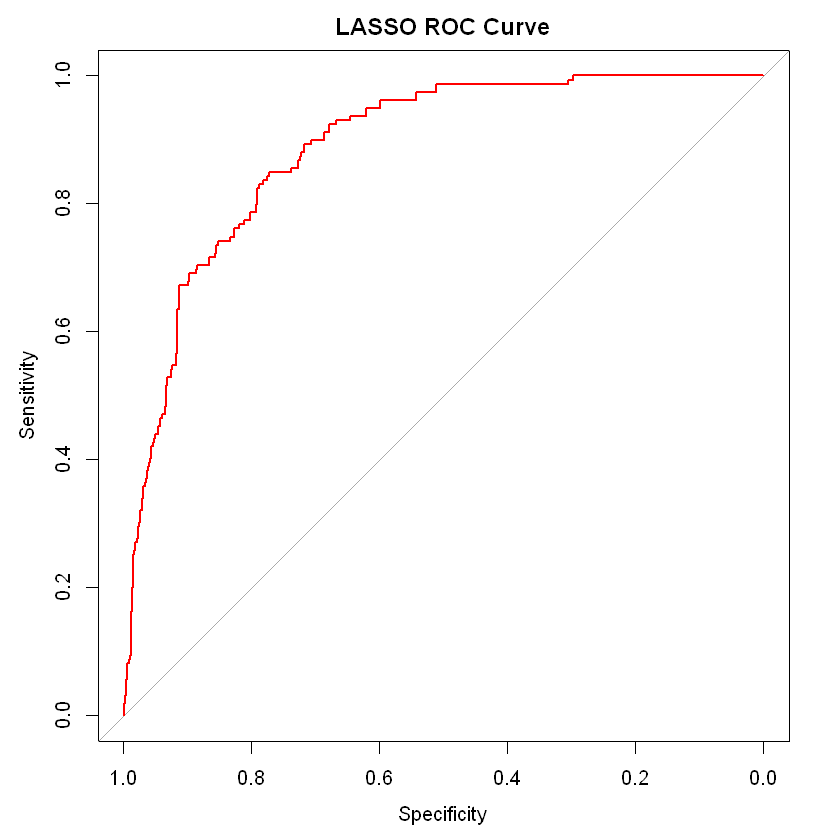

In [90]:
# Get predicted probabilities
lasso_probs <- predict(cvfit, newx = x, s = "lambda.min", type = "response")
lasso_pred <- ifelse(lasso_probs > 0.5, 1, 0)

# Confusion matrix
table(Predicted = lasso_pred, Actual = y)

# ROC curve and AUC
library(pROC)
roc_lasso <- roc(y, as.vector(lasso_probs))
plot(roc_lasso, col = "red", main = "LASSO ROC Curve")
auc(roc_lasso)


In [91]:
# Get non-zero coefficients (excluding intercept)
lasso_coef <- coef(cvfit, s = "lambda.min")
selected_vars <- rownames(lasso_coef)[which(lasso_coef != 0)]
selected_vars <- selected_vars[!selected_vars %in% "(Intercept)"]

# Build formula manually
formula_lasso <- as.formula(paste("high_quality ~", paste(selected_vars, collapse = " + ")))

# Fit standard glm on selected variables
glm_selected <- glm(formula_lasso, data = data, family = "binomial")

# Check VIF
library(car)
vif(glm_selected)


fixed.acidity     volatile.acidity          citric.acid 
            8.515352             1.667264             3.248802 
      residual.sugar            chlorides total.sulfur.dioxide 
            1.782713             1.276960             1.227498 
             density                   pH            sulphates 
            8.603387             3.493008             1.295193 
             alcohol 
            2.846141

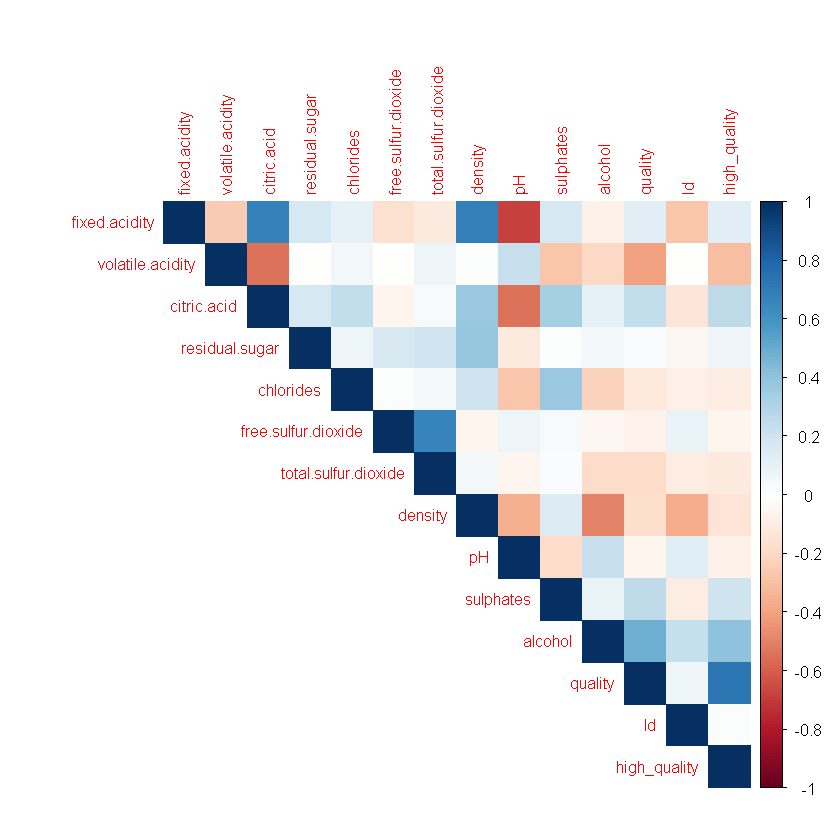

In [92]:
numeric_vars <- data[, sapply(data, is.numeric)]
cor_matrix <- cor(numeric_vars, use = "complete.obs")

library(corrplot)
corrplot(cor_matrix, method = "color", type = "upper", tl.cex = 0.8)


In [93]:
library(MASS)
full_model <- glm(high_quality ~ . - quality - Id, data = data, family = "binomial")

# Stepwise selection (both directions based on AIC)
step_model <- stepAIC(full_model, direction = "both")

# Check VIF of selected model
library(car)
vif(step_model)


Start:  AIC=643.78
high_quality ~ (fixed.acidity + volatile.acidity + citric.acid + 
    residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates + alcohol + quality + Id) - quality - 
    Id

                       Df Deviance    AIC
- pH                    1   619.95 641.95
- free.sulfur.dioxide   1   620.03 642.03
- fixed.acidity         1   621.24 643.24
<none>                      619.78 643.78
- citric.acid           1   623.01 645.01
- density               1   623.80 645.80
- residual.sugar        1   625.12 647.12
- total.sulfur.dioxide  1   626.56 648.56
- volatile.acidity      1   630.07 652.07
- chlorides             1   630.65 652.65
- alcohol               1   637.73 659.73
- sulphates             1   646.48 668.48

Step:  AIC=641.95
high_quality ~ fixed.acidity + volatile.acidity + citric.acid + 
    residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + sulphates + alcohol

                

fixed.acidity     volatile.acidity          citric.acid 
            4.493288             1.621381             3.074395 
      residual.sugar            chlorides total.sulfur.dioxide 
            1.565256             1.269243             1.214484 
             density            sulphates              alcohol 
            5.842205             1.224541             2.008344

In [94]:
cor(data[, c("density", "fixed.acidity", "residual.sugar", "alcohol")])


,density,fixed.acidity,residual.sugar,alcohol
density,1.0000000,0.68150088,0.38014695,-0.49472690
fixed.acidity,0.6815009,1.00000000,0.17183054,-0.07505485
residual.sugar,0.3801470,0.17183054,1.00000000,0.05842061
alcohol,-0.4947269,-0.07505485,0.05842061,1.00000000


In [95]:
data$density_combined <- 0.6815 * data$fixed.acidity - 0.4947 * data$alcohol


In [111]:
library(MASS)
full_model_interactions <- glm(
  high_quality ~ (.-quality - Id - density - density_combined)^2, 
  data = data, 
  family = "binomial"
)

# Stepwise selection (both directions based on AIC)
step_model_I <- stepAIC(full_model_interactions, direction = "both")

# Check VIF of selected model
library(car)


summary(step_model_I)

Start:  AIC=657.52
high_quality ~ ((fixed.acidity + volatile.acidity + citric.acid + 
    residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates + alcohol + quality + Id + density_combined) - 
    quality - Id - density - density_combined)^2

                                           Df Deviance    AIC
- fixed.acidity:citric.acid                 1   545.52 655.52
- volatile.acidity:citric.acid              1   545.52 655.52
- chlorides:alcohol                         1   545.52 655.52
- volatile.acidity:pH                       1   545.54 655.54
- total.sulfur.dioxide:alcohol              1   545.54 655.54
- fixed.acidity:volatile.acidity            1   545.54 655.54
- citric.acid:sulphates                     1   545.55 655.55
- residual.sugar:alcohol                    1   545.55 655.55
- free.sulfur.dioxide:pH                    1   545.56 655.56
- fixed.acidity:total.sulfur.dioxide        1   545.56 655.56
- fixed.acidity:free.sulfu

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                           Df Deviance    AIC
- free.sulfur.dioxide:pH                    1   545.64 641.64
- fixed.acidity:total.sulfur.dioxide        1   545.65 641.65
- fixed.acidity:free.sulfur.dioxide         1   545.71 641.71
- fixed.acidity:volatile.acidity            1   545.78 641.78
- residual.sugar:chlorides                  1   545.82 641.82
- volatile.acidity:chlorides                1   545.83 641.83
- total.sulfur.dioxide:sulphates            1   545.88 641.88
- volatile.acidity:alcohol                  1   545.88 641.88
- fixed.acidity:chlorides                   1   545.88 641.88
- chlorides:sulphates                       1   545.90 641.90
- volatile.acidity:free.sulfur.dioxide      1   545.93 641.93
- citric.acid:residual.sugar                1   545.94 641.94
- volatile.acidity:sulphates                1   545.98 641.98
- fixed.acidity:sulphates                   1   546.00 642.00
- pH:sulphates                              1   546.01 642.01
- residu

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                           Df Deviance    AIC
- fixed.acidity:total.sulfur.dioxide        1   545.67 639.67
- fixed.acidity:free.sulfur.dioxide         1   545.76 639.76
- fixed.acidity:volatile.acidity            1   545.81 639.81
- residual.sugar:chlorides                  1   545.85 639.85
- volatile.acidity:chlorides                1   545.86 639.86
- total.sulfur.dioxide:sulphates            1   545.88 639.88
- volatile.acidity:alcohol                  1   545.91 639.91
- fixed.acidity:chlorides                   1   545.93 639.93
- chlorides:sulphates                       1   545.94 639.94
- volatile.acidity:free.sulfur.dioxide      1   545.94 639.94
- citric.acid:residual.sugar                1   545.95 639.95
- volatile.acidity:sulphates                1   546.01 640.01
- pH:sulphates                              1   546.02 640.02
- fixed.acidity:sulphates                   1   546.04 640.04
- residual.sugar:total.sulfur.dioxide       1   546.11 640.11
- citric

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                           Df Deviance    AIC
- fixed.acidity:volatile.acidity            1   545.83 637.83
- residual.sugar:chlorides                  1   545.88 637.88
- volatile.acidity:chlorides                1   545.88 637.88
- total.sulfur.dioxide:sulphates            1   545.92 637.92
- volatile.acidity:alcohol                  1   545.94 637.94
- chlorides:sulphates                       1   545.96 637.96
- fixed.acidity:chlorides                   1   545.98 637.98
- volatile.acidity:free.sulfur.dioxide      1   546.02 638.02
- volatile.acidity:sulphates                1   546.03 638.03
- citric.acid:residual.sugar                1   546.03 638.03
- pH:sulphates                              1   546.06 638.06
- fixed.acidity:sulphates                   1   546.07 638.07
- fixed.acidity:free.sulfur.dioxide         1   546.12 638.12
- residual.sugar:total.sulfur.dioxide       1   546.23 638.23
- citric.acid:chlorides                     1   546.33 638.33
- free.s

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                           Df Deviance    AIC
- residual.sugar:chlorides                  1   546.23 634.23
- total.sulfur.dioxide:sulphates            1   546.25 634.25
- volatile.acidity:chlorides                1   546.29 634.29
- chlorides:sulphates                       1   546.29 634.29
- volatile.acidity:free.sulfur.dioxide      1   546.31 634.31
- volatile.acidity:sulphates                1   546.33 634.33
- pH:sulphates                              1   546.38 634.38
- fixed.acidity:chlorides                   1   546.38 634.38
- citric.acid:residual.sugar                1   546.43 634.43
- fixed.acidity:sulphates                   1   546.45 634.45
- fixed.acidity:free.sulfur.dioxide         1   546.53 634.53
- residual.sugar:total.sulfur.dioxide       1   546.55 634.55
- citric.acid:chlorides                     1   546.78 634.78
- free.sulfur.dioxide:total.sulfur.dioxide  1   546.86 634.86
- volatile.acidity:residual.sugar           1   547.01 635.01
- residu

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                           Df Deviance    AIC
- chlorides:sulphates                       1   546.65 630.65
- volatile.acidity:chlorides                1   546.69 630.69
- fixed.acidity:chlorides                   1   546.78 630.78
- volatile.acidity:sulphates                1   546.78 630.78
- residual.sugar:total.sulfur.dioxide       1   546.84 630.84
- volatile.acidity:free.sulfur.dioxide      1   546.84 630.84
- fixed.acidity:sulphates                   1   546.88 630.88
- pH:sulphates                              1   546.88 630.88
- fixed.acidity:free.sulfur.dioxide         1   546.91 630.91
- citric.acid:residual.sugar                1   547.08 631.08
- residual.sugar:free.sulfur.dioxide        1   547.40 631.40
- citric.acid:chlorides                     1   547.40 631.40
- free.sulfur.dioxide:total.sulfur.dioxide  1   547.52 631.52
- pH:alcohol                                1   547.73 631.73
- volatile.acidity:residual.sugar           1   547.78 631.78
- chlori

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                           Df Deviance    AIC
- fixed.acidity:chlorides                   1   546.81 628.81
- volatile.acidity:sulphates                1   546.89 628.89
- volatile.acidity:chlorides                1   546.93 628.93
- fixed.acidity:sulphates                   1   546.99 628.99
- residual.sugar:total.sulfur.dioxide       1   547.00 629.00
- volatile.acidity:free.sulfur.dioxide      1   547.02 629.02
- pH:sulphates                              1   547.06 629.06
- fixed.acidity:free.sulfur.dioxide         1   547.07 629.07
- citric.acid:residual.sugar                1   547.19 629.19
- residual.sugar:free.sulfur.dioxide        1   547.56 629.56
- free.sulfur.dioxide:total.sulfur.dioxide  1   547.67 629.67
- pH:alcohol                                1   547.90 629.90
- chlorides:pH                              1   547.92 629.92
- volatile.acidity:residual.sugar           1   547.98 629.98
- chlorides:free.sulfur.dioxide             1   548.13 630.13
- citric

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                           Df Deviance    AIC
- volatile.acidity:sulphates                1   547.03 627.03
- fixed.acidity:sulphates                   1   547.06 627.06
- residual.sugar:total.sulfur.dioxide       1   547.16 627.16
- volatile.acidity:free.sulfur.dioxide      1   547.21 627.21
- fixed.acidity:free.sulfur.dioxide         1   547.27 627.27
- pH:sulphates                              1   547.29 627.29
- volatile.acidity:chlorides                1   547.30 627.30
- citric.acid:residual.sugar                1   547.35 627.35
- residual.sugar:free.sulfur.dioxide        1   547.73 627.73
- free.sulfur.dioxide:total.sulfur.dioxide  1   547.85 627.85
- chlorides:pH                              1   547.95 627.95
- volatile.acidity:residual.sugar           1   548.07 628.07
- pH:alcohol                                1   548.20 628.20
- chlorides:free.sulfur.dioxide             1   548.31 628.31
- citric.acid:alcohol                       1   548.32 628.32
- citric

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                           Df Deviance    AIC
- fixed.acidity:sulphates                   1   547.21 625.21
- residual.sugar:total.sulfur.dioxide       1   547.37 625.37
- pH:sulphates                              1   547.40 625.40
- volatile.acidity:chlorides                1   547.43 625.43
- volatile.acidity:free.sulfur.dioxide      1   547.51 625.51
- citric.acid:residual.sugar                1   547.51 625.51
- fixed.acidity:free.sulfur.dioxide         1   547.57 625.57
- residual.sugar:free.sulfur.dioxide        1   547.98 625.98
- free.sulfur.dioxide:total.sulfur.dioxide  1   548.02 626.02
- chlorides:pH                              1   548.16 626.16
- pH:alcohol                                1   548.35 626.35
- chlorides:free.sulfur.dioxide             1   548.42 626.42
- volatile.acidity:residual.sugar           1   548.45 626.45
- citric.acid:alcohol                       1   548.49 626.49
- citric.acid:free.sulfur.dioxide           1   548.73 626.73
<none>  

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                           Df Deviance    AIC
- residual.sugar:total.sulfur.dioxide       1   547.55 623.55
- volatile.acidity:chlorides                1   547.62 623.62
- volatile.acidity:free.sulfur.dioxide      1   547.68 623.68
- citric.acid:residual.sugar                1   547.69 623.69
- fixed.acidity:free.sulfur.dioxide         1   547.76 623.76
- residual.sugar:free.sulfur.dioxide        1   548.14 624.14
- free.sulfur.dioxide:total.sulfur.dioxide  1   548.34 624.34
- chlorides:pH                              1   548.40 624.40
- pH:alcohol                                1   548.44 624.44
- chlorides:free.sulfur.dioxide             1   548.55 624.55
- volatile.acidity:residual.sugar           1   548.62 624.62
- citric.acid:alcohol                       1   548.62 624.62
- pH:sulphates                              1   548.78 624.78
- citric.acid:free.sulfur.dioxide           1   548.89 624.89
<none>                                          547.21 625.21
- fixed.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                           Df Deviance    AIC
- volatile.acidity:free.sulfur.dioxide      1   547.95 621.95
- volatile.acidity:chlorides                1   547.95 621.95
- citric.acid:residual.sugar                1   547.99 621.99
- fixed.acidity:free.sulfur.dioxide         1   548.13 622.13
- residual.sugar:free.sulfur.dioxide        1   548.22 622.22
- free.sulfur.dioxide:total.sulfur.dioxide  1   548.51 622.51
- pH:alcohol                                1   548.70 622.70
- chlorides:pH                              1   548.74 622.74
- citric.acid:free.sulfur.dioxide           1   548.89 622.89
- citric.acid:alcohol                       1   548.93 622.93
- volatile.acidity:residual.sugar           1   548.97 622.97
- pH:sulphates                              1   549.12 623.12
- chlorides:free.sulfur.dioxide             1   549.37 623.37
<none>                                          547.55 623.55
- fixed.acidity:pH                          1   549.85 623.85
- total.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                           Df Deviance    AIC
- volatile.acidity:chlorides                1   548.34 620.34
- citric.acid:residual.sugar                1   548.35 620.35
- fixed.acidity:free.sulfur.dioxide         1   548.45 620.45
- residual.sugar:free.sulfur.dioxide        1   548.46 620.46
- citric.acid:free.sulfur.dioxide           1   548.90 620.90
- free.sulfur.dioxide:total.sulfur.dioxide  1   548.99 620.99
- pH:alcohol                                1   549.02 621.02
- volatile.acidity:residual.sugar           1   549.12 621.12
- chlorides:pH                              1   549.19 621.19
- pH:sulphates                              1   549.39 621.39
- citric.acid:alcohol                       1   549.41 621.41
<none>                                          547.95 621.95
- chlorides:free.sulfur.dioxide             1   550.09 622.09
- fixed.acidity:pH                          1   550.34 622.34
- total.sulfur.dioxide:pH                   1   550.38 622.38
- fixed.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                           Df Deviance    AIC
- citric.acid:residual.sugar                1   548.73 618.73
- fixed.acidity:free.sulfur.dioxide         1   548.78 618.78
- residual.sugar:free.sulfur.dioxide        1   548.84 618.84
- citric.acid:free.sulfur.dioxide           1   549.23 619.23
- free.sulfur.dioxide:total.sulfur.dioxide  1   549.27 619.27
- pH:alcohol                                1   549.36 619.36
- chlorides:pH                              1   549.48 619.48
- pH:sulphates                              1   549.85 619.85
- citric.acid:alcohol                       1   549.95 619.95
- volatile.acidity:residual.sugar           1   549.97 619.97
- chlorides:free.sulfur.dioxide             1   550.17 620.17
<none>                                          548.34 620.34
- fixed.acidity:pH                          1   550.77 620.77
- total.sulfur.dioxide:pH                   1   550.80 620.80
- fixed.acidity:residual.sugar              1   551.07 621.07
- citric

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=618.73
high_quality ~ fixed.acidity + volatile.acidity + citric.acid + 
    residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    pH + sulphates + alcohol + fixed.acidity:residual.sugar + 
    fixed.acidity:free.sulfur.dioxide + fixed.acidity:pH + fixed.acidity:alcohol + 
    volatile.acidity:residual.sugar + volatile.acidity:total.sulfur.dioxide + 
    citric.acid:chlorides + citric.acid:free.sulfur.dioxide + 
    citric.acid:total.sulfur.dioxide + citric.acid:pH + citric.acid:alcohol + 
    residual.sugar:free.sulfur.dioxide + residual.sugar:pH + 
    residual.sugar:sulphates + chlorides:free.sulfur.dioxide + 
    chlorides:total.sulfur.dioxide + chlorides:pH + free.sulfur.dioxide:total.sulfur.dioxide + 
    free.sulfur.dioxide:sulphates + free.sulfur.dioxide:alcohol + 
    total.sulfur.dioxide:pH + pH:sulphates + pH:alcohol + sulphates:alcohol



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                           Df Deviance    AIC
- residual.sugar:free.sulfur.dioxide        1   549.11 617.11
- fixed.acidity:free.sulfur.dioxide         1   549.15 617.15
- citric.acid:free.sulfur.dioxide           1   549.46 617.46
- free.sulfur.dioxide:total.sulfur.dioxide  1   549.60 617.60
- pH:alcohol                                1   549.69 617.69
- chlorides:pH                              1   549.85 617.85
- volatile.acidity:residual.sugar           1   550.18 618.18
- pH:sulphates                              1   550.34 618.34
- chlorides:free.sulfur.dioxide             1   550.64 618.64
<none>                                          548.73 618.73
- citric.acid:alcohol                       1   550.74 618.74
- total.sulfur.dioxide:pH                   1   551.42 619.42
- sulphates:alcohol                         1   551.78 619.78
- residual.sugar:pH                         1   551.80 619.80
- fixed.acidity:pH                          1   551.82 619.82
- citric

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                           Df Deviance    AIC
- fixed.acidity:free.sulfur.dioxide         1   549.57 615.57
- citric.acid:free.sulfur.dioxide           1   549.84 615.84
- pH:alcohol                                1   550.10 616.10
- free.sulfur.dioxide:total.sulfur.dioxide  1   550.19 616.19
- chlorides:pH                              1   550.25 616.25
- volatile.acidity:residual.sugar           1   550.32 616.32
- pH:sulphates                              1   550.83 616.83
- chlorides:free.sulfur.dioxide             1   550.89 616.89
- citric.acid:alcohol                       1   551.09 617.09
<none>                                          549.11 617.11
- total.sulfur.dioxide:pH                   1   551.66 617.66
- sulphates:alcohol                         1   552.07 618.07
- residual.sugar:pH                         1   552.28 618.28
- fixed.acidity:pH                          1   552.44 618.44
- citric.acid:chlorides                     1   552.48 618.48
+ volati

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=615.57
high_quality ~ fixed.acidity + volatile.acidity + citric.acid + 
    residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    pH + sulphates + alcohol + fixed.acidity:residual.sugar + 
    fixed.acidity:pH + fixed.acidity:alcohol + volatile.acidity:residual.sugar + 
    volatile.acidity:total.sulfur.dioxide + citric.acid:chlorides + 
    citric.acid:free.sulfur.dioxide + citric.acid:total.sulfur.dioxide + 
    citric.acid:pH + citric.acid:alcohol + residual.sugar:pH + 
    residual.sugar:sulphates + chlorides:free.sulfur.dioxide + 
    chlorides:total.sulfur.dioxide + chlorides:pH + free.sulfur.dioxide:total.sulfur.dioxide + 
    free.sulfur.dioxide:sulphates + free.sulfur.dioxide:alcohol + 
    total.sulfur.dioxide:pH + pH:sulphates + pH:alcohol + sulphates:alcohol



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                           Df Deviance    AIC
- citric.acid:free.sulfur.dioxide           1   549.85 613.85
- free.sulfur.dioxide:total.sulfur.dioxide  1   550.44 614.44
- pH:alcohol                                1   550.66 614.66
- chlorides:pH                              1   550.79 614.79
- volatile.acidity:residual.sugar           1   550.81 614.81
- chlorides:free.sulfur.dioxide             1   551.19 615.19
- pH:sulphates                              1   551.45 615.45
<none>                                          549.57 615.57
- citric.acid:alcohol                       1   551.65 615.65
- fixed.acidity:pH                          1   552.59 616.59
- sulphates:alcohol                         1   552.64 616.64
- citric.acid:chlorides                     1   552.68 616.68
+ fixed.acidity:total.sulfur.dioxide        1   548.99 616.99
- residual.sugar:pH                         1   553.00 617.00
+ fixed.acidity:free.sulfur.dioxide         1   549.11 617.11
+ residu

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=613.85
high_quality ~ fixed.acidity + volatile.acidity + citric.acid + 
    residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    pH + sulphates + alcohol + fixed.acidity:residual.sugar + 
    fixed.acidity:pH + fixed.acidity:alcohol + volatile.acidity:residual.sugar + 
    volatile.acidity:total.sulfur.dioxide + citric.acid:chlorides + 
    citric.acid:total.sulfur.dioxide + citric.acid:pH + citric.acid:alcohol + 
    residual.sugar:pH + residual.sugar:sulphates + chlorides:free.sulfur.dioxide + 
    chlorides:total.sulfur.dioxide + chlorides:pH + free.sulfur.dioxide:total.sulfur.dioxide + 
    free.sulfur.dioxide:sulphates + free.sulfur.dioxide:alcohol + 
    total.sulfur.dioxide:pH + pH:sulphates + pH:alcohol + sulphates:alcohol



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                           Df Deviance    AIC
- chlorides:pH                              1   550.92 612.92
- free.sulfur.dioxide:total.sulfur.dioxide  1   550.95 612.95
- volatile.acidity:residual.sugar           1   551.07 613.07
- pH:alcohol                                1   551.17 613.17
- chlorides:free.sulfur.dioxide             1   551.74 613.74
- pH:sulphates                              1   551.79 613.79
<none>                                          549.85 613.85
- citric.acid:alcohol                       1   551.95 613.95
- fixed.acidity:pH                          1   552.82 614.82
- sulphates:alcohol                         1   552.99 614.99
- citric.acid:chlorides                     1   553.04 615.04
+ residual.sugar:free.sulfur.dioxide        1   549.46 615.46
+ volatile.acidity:chlorides                1   549.51 615.51
+ total.sulfur.dioxide:sulphates            1   549.54 615.54
+ citric.acid:free.sulfur.dioxide           1   549.57 615.57
+ fixed.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                           Df Deviance    AIC
- free.sulfur.dioxide:total.sulfur.dioxide  1   551.94 611.94
- volatile.acidity:residual.sugar           1   552.06 612.06
- pH:sulphates                              1   552.80 612.80
<none>                                          550.92 612.92
- pH:alcohol                                1   552.93 612.93
- citric.acid:alcohol                       1   553.07 613.07
- chlorides:free.sulfur.dioxide             1   553.44 613.44
- citric.acid:chlorides                     1   553.65 613.65
+ chlorides:pH                              1   549.85 613.85
- sulphates:alcohol                         1   554.29 614.29
+ residual.sugar:free.sulfur.dioxide        1   550.50 614.50
- fixed.acidity:pH                          1   554.62 614.62
+ fixed.acidity:total.sulfur.dioxide        1   550.63 614.63
- total.sulfur.dioxide:pH                   1   554.63 614.63
+ volatile.acidity:chlorides                1   550.67 614.67
+ total.


Call:
glm(formula = high_quality ~ fixed.acidity + volatile.acidity + 
    citric.acid + residual.sugar + chlorides + free.sulfur.dioxide + 
    total.sulfur.dioxide + pH + sulphates + alcohol + fixed.acidity:residual.sugar + 
    fixed.acidity:pH + fixed.acidity:alcohol + volatile.acidity:total.sulfur.dioxide + 
    citric.acid:chlorides + citric.acid:total.sulfur.dioxide + 
    citric.acid:pH + citric.acid:alcohol + residual.sugar:pH + 
    residual.sugar:sulphates + chlorides:free.sulfur.dioxide + 
    chlorides:total.sulfur.dioxide + free.sulfur.dioxide:sulphates + 
    free.sulfur.dioxide:alcohol + total.sulfur.dioxide:pH + pH:alcohol + 
    sulphates:alcohol, family = "binomial", data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.20952  -0.39593  -0.18726  -0.04787   2.93103  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           -30.01771   46.21689  -0.649 0.516

In [112]:
vif(step_model_I)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



fixed.acidity                      volatile.acidity 
                          1624.205672                              5.314791 
                          citric.acid                        residual.sugar 
                          1680.168853                           2780.563315 
                            chlorides                   free.sulfur.dioxide 
                            14.342656                            244.913155 
                 total.sulfur.dioxide                                    pH 
                          1143.236033                            352.864628 
                            sulphates                               alcohol 
                           128.184382                           1495.155865 
         fixed.acidity:residual.sugar                      fixed.acidity:pH 
                           151.219779                           1030.029975 
                fixed.acidity:alcohol volatile.acidity:total.sulfur.dioxide 
                           370.556133                             15.219769 
                citric.acid:chlorides      citric.acid:total.sulfur.dioxide 
                            25.644953                             24.338362 
                       citric.acid:pH                   citric.acid:alcohol 
                          1471.407416                            301.984826 
                    residual.sugar:pH              residual.sugar:sulphates 
                          2013.571506                             48.165030 
        chlorides:free.sulfur.dioxide        chlorides:total.sulfur.dioxide 
                            56.557927                             51.424354 
        free.sulfur.dioxide:sulphates           free.sulfur.dioxide:alcohol 
                            32.102578                            161.176058 
              total.sulfur.dioxide:pH                            pH:alcohol 
                          1001.053900                           1756.904754 
                    sulphates:alcohol 
                           161.705283

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



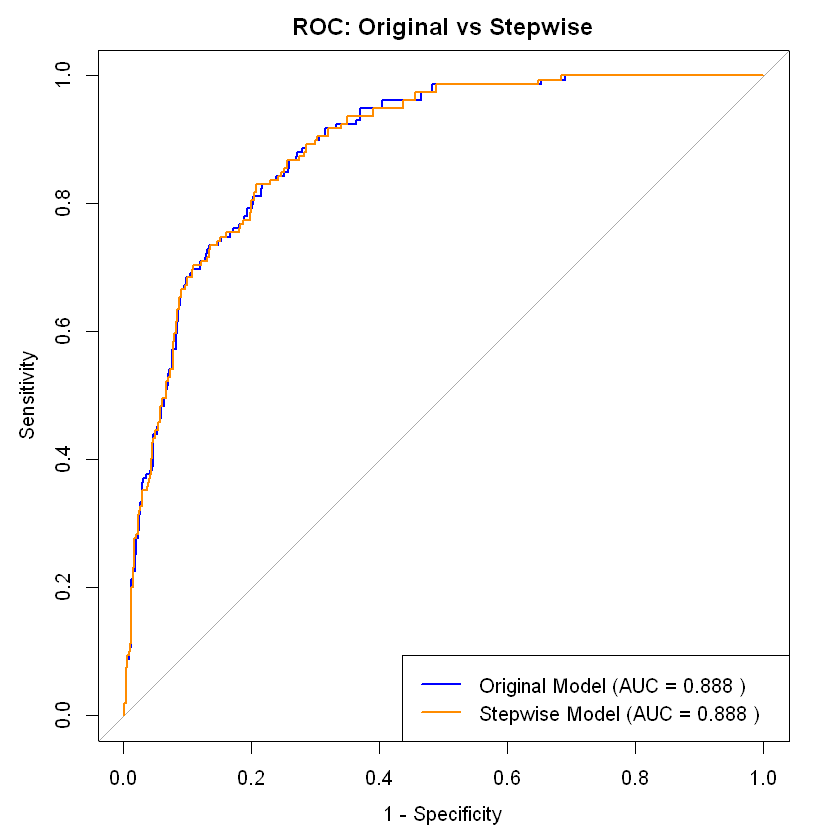

In [97]:
library(pROC)

# Actual binary outcome
actual <- data$high_quality

# Predicted probabilities
probs_orig <- predict(glm_model, type = "response")
probs_step <- predict(step_model, type = "response")

# ROC curves
roc_orig <- roc(actual, probs_orig)
roc_step <- roc(actual, probs_step)

# Plot both
plot(roc_orig, col = "blue", lwd = 2, main = "ROC: Original vs Stepwise", legacy.axes = TRUE)
lines(roc_step, col = "darkorange", lwd = 2)

# Add legend with AUCs
legend("bottomright", legend = c(
  paste("Original Model (AUC =", round(auc(roc_orig), 3), ")"),
  paste("Stepwise Model (AUC =", round(auc(roc_step), 3), ")")
), col = c("blue", "darkorange"), lwd = 2)


In [98]:
vif(step_model)

fixed.acidity     volatile.acidity          citric.acid 
            4.493288             1.621381             3.074395 
      residual.sugar            chlorides total.sulfur.dioxide 
            1.565256             1.269243             1.214484 
             density            sulphates              alcohol 
            5.842205             1.224541             2.008344

In [99]:
# Predict probabilities from stepwise model
step_probs <- predict(step_model, type = "response")

# Convert to predicted class labels using threshold 0.5
step_preds <- ifelse(step_probs > 0.5, 1, 0)

# Actual class labels
actual <- data$high_quality

# Confusion matrix
conf_matrix <- table(Predicted = step_preds, Actual = actual)
print(conf_matrix)


         Actual
Predicted   0   1
        0 948 103
        1  36  56


In [100]:
TP <- conf_matrix["1", "1"]
TN <- conf_matrix["0", "0"]
FP <- conf_matrix["1", "0"]
FN <- conf_matrix["0", "1"]

accuracy <- (TP + TN) / sum(conf_matrix)
sensitivity <- TP / (TP + FN)
specificity <- TN / (TN + FP)

cat("Accuracy:", round(accuracy, 3), "\n")
cat("Sensitivity (Recall):", round(sensitivity, 3), "\n")
cat("Specificity:", round(specificity, 3), "\n")


Accuracy: 0.878 
Sensitivity (Recall): 0.352 
Specificity: 0.963 


In [101]:

library(smotefamily)

In [102]:
# Ensure target is numeric binary (0/1) for smotefamily
data$high_quality <- as.numeric(as.character(data$high_quality))



# Drop Id and quality, but keep all predictors
X <- data[, !(names(data) %in% c("high_quality", "quality", "Id", "density"))]
y <- data$high_quality


In [103]:
set.seed(123)
smote_result <- SMOTE(X, y, K = 5, dup_size = 1)  # dup_size = 1 → double the minority class

# Recombine SMOTE results into a data frame
data_smote <- smote_result$data
colnames(data_smote)[ncol(data_smote)] <- "high_quality"
data_smote$high_quality <- as.factor(data_smote$high_quality)


In [104]:
library(MASS)
full_model_interactions <- glm(
  high_quality ~ (.)^2, 
  data = data_smote, 
  family = "binomial"
)

step_model_smote <- stepAIC(full_model_smote, direction = "both")
summary(step_model_smote)


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Start:  AIC=933.32
high_quality ~ fixed.acidity + volatile.acidity + citric.acid + 
    residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    pH + sulphates + alcohol + density_combined


Step:  AIC=933.32
high_quality ~ fixed.acidity + volatile.acidity + citric.acid + 
    residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    pH + sulphates + alcohol

                       Df Deviance     AIC
- fixed.acidity         1   911.67  931.67
- residual.sugar        1   912.88  932.88
- free.sulfur.dioxide   1   913.09  933.09
<none>                      911.32  933.32
- citric.acid           1   914.92  934.92
- pH                    1   916.43  936.43
- total.sulfur.dioxide  1   924.13  944.13
- volatile.acidity      1   930.58  950.58
- chlorides             1   932.47  952.47
- sulphates             1   950.50  970.50
- alcohol               1  1071.02 1091.02

Step:  AIC=931.67
high_quality ~ volatile.acidity + citric.acid + residual.sug


Call:
glm(formula = high_quality ~ volatile.acidity + citric.acid + 
    chlorides + total.sulfur.dioxide + pH + sulphates + alcohol, 
    family = "binomial", data = data_smote)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.97088  -0.51184  -0.24314  -0.06704   2.71384  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -7.418812   2.513642  -2.951 0.003163 ** 
volatile.acidity      -3.253387   0.707203  -4.600 4.22e-06 ***
citric.acid            1.359739   0.669753   2.030 0.042335 *  
chlorides            -13.223672   3.859950  -3.426 0.000613 ***
total.sulfur.dioxide  -0.009359   0.002743  -3.412 0.000644 ***
pH                    -1.570755   0.723130  -2.172 0.029844 *  
sulphates              3.280158   0.536554   6.113 9.75e-10 ***
alcohol                1.071579   0.091210  11.748  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial fa

In [64]:
vif(step_model_smote)

volatile.acidity          citric.acid            chlorides 
            1.502453             2.375264             1.265841 
total.sulfur.dioxide                   pH            sulphates 
            1.038840             1.883848             1.086615 
             alcohol 
            1.193803

In [65]:
# Ensure original target is a factor (if needed)
data$high_quality <- as.factor(data$high_quality)

# Get predicted probabilities
step_probs <- predict(step_model_smote, newdata = data, type = "response")

# Classify using threshold 0.5
step_preds <- ifelse(step_probs > 0.5, 1, 0)


In [66]:
# Compare predictions to actual
conf_matrix <- table(Predicted = step_preds, Actual = data$high_quality)
print(conf_matrix)

# Optional metrics
TP <- conf_matrix["1", "1"]
TN <- conf_matrix["0", "0"]
FP <- conf_matrix["1", "0"]
FN <- conf_matrix["0", "1"]

accuracy <- (TP + TN) / sum(conf_matrix)
sensitivity <- TP / (TP + FN)
specificity <- TN / (TN + FP)

cat("Accuracy:", round(accuracy, 3), "\n")
cat("Sensitivity (Recall):", round(sensitivity, 3), "\n")
cat("Specificity:", round(specificity, 3), "\n")


         Actual
Predicted   0   1
        0 900  65
        1  84  94
Accuracy: 0.87 
Sensitivity (Recall): 0.591 
Specificity: 0.915 


Setting levels: control = 0, case = 1

Setting direction: controls < cases



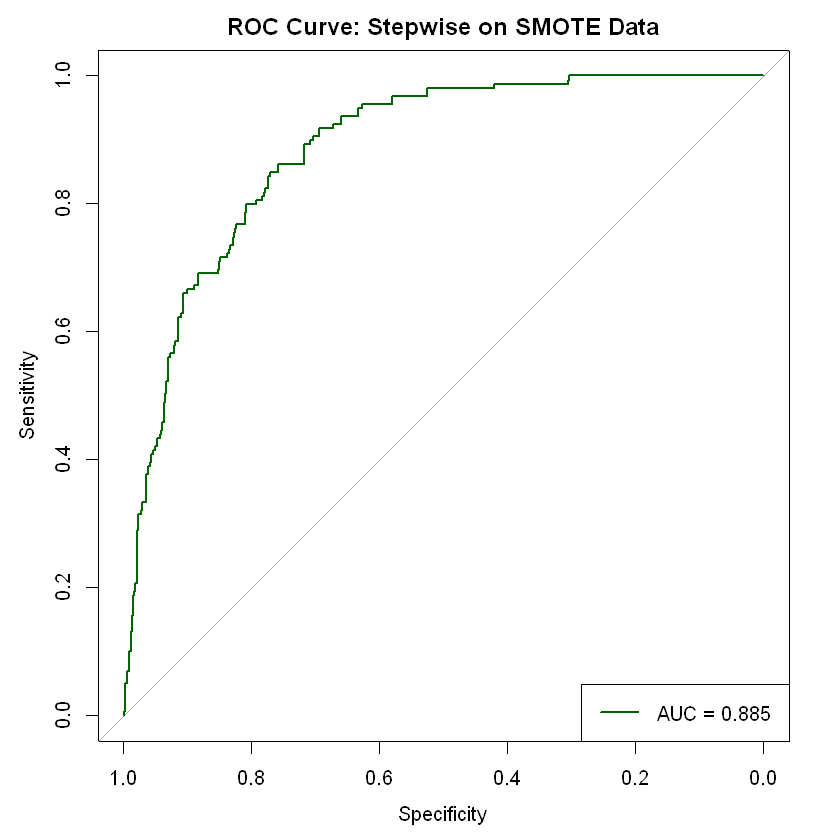

In [67]:
library(pROC)

# ROC object
roc_smote <- roc(data$high_quality, step_probs)

# Plot ROC
plot(roc_smote, col = "darkgreen", lwd = 2, main = "ROC Curve: Stepwise on SMOTE Data")
legend("bottomright", legend = paste("AUC =", round(auc(roc_smote), 3)),
       col = "darkgreen", lwd = 2)


In [68]:
library(pROC)

# Use predicted probabilities from your SMOTE-trained stepwise model
step_probs <- predict(step_model_smote, newdata = data, type = "response")

# Create ROC object
roc_obj <- roc(data$high_quality, step_probs)





Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [69]:
library(pROC)

# Create ROC object
roc_obj <- roc(data$high_quality, step_probs)

# Extract all thresholds with sensitivity and specificity
roc_df <- coords(roc_obj, x = "all", input = "threshold",
                 ret = c("threshold", "sensitivity", "specificity"),
                 transpose = FALSE)  # ✅ critical: do NOT transpose

# Confirm structure
str(roc_df)
head(roc_df)


Setting levels: control = 0, case = 1

Setting direction: controls < cases



'data.frame':	1017 obs. of  3 variables:
 $ threshold  : num  -Inf 0.000716 0.001019 0.001387 0.001788 ...
 $ sensitivity: num  1 1 1 1 1 1 1 1 1 1 ...
 $ specificity: num  0 0.00102 0.00203 0.00305 0.00508 ...


,threshold,sensitivity,specificity
,<dbl>,<dbl>,<dbl>
1,-Inf,1,0.000000000
2,0.0007156738,1,0.001016260
3,0.0010187457,1,0.002032520
4,0.0013872195,1,0.003048780
5,0.0017876346,1,0.005081301
6,0.0019139259,1,0.006097561


In [34]:
# Filter between 0.2 and 0.6
moderate_thresh <- subset(roc_df, threshold >= 0.2 & threshold <= 0.6)

# Add Youden's index
moderate_thresh$youden <- moderate_thresh$sensitivity + moderate_thresh$specificity - 1

# Create accuracy column by applying each threshold
moderate_thresh$accuracy <- sapply(moderate_thresh$threshold, function(thresh) {
  preds <- ifelse(step_probs > thresh, 1, 0)
  mean(preds == actual)
})

# Sort again by Youden or accuracy if desired
moderate_thresh <- moderate_thresh[order(-moderate_thresh$youden), ]


# Sort by Youden's index to find optimal balance
moderate_thresh <- moderate_thresh[order(-moderate_thresh$youden), ]

# View top candidates
head(moderate_thresh, 10)


,threshold,sensitivity,specificity,youden,accuracy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
694,0.2096688,0.8490566,0.7703252,0.6193818,0.7812773
693,0.2089769,0.8490566,0.7693089,0.6183655,0.7804024
692,0.2071367,0.8490566,0.7682927,0.6173493,0.7795276
698,0.2135154,0.8427673,0.7743902,0.6171575,0.7839020
691,0.2053629,0.8490566,0.7672764,0.6163330,0.7786527
690,0.2045473,0.8490566,0.7662602,0.6153168,0.7777778
697,0.2125107,0.8427673,0.7723577,0.6151250,0.7821522
689,0.2030638,0.8490566,0.7652439,0.6143005,0.7769029
696,0.2113362,0.8427673,0.7713415,0.6141088,0.7812773


In [70]:
optimal_thresh <- 0.2135154  # example from your ROC filtering


In [71]:
step_probs <- predict(step_model_smote, newdata = data, type = "response")


In [72]:
# Apply threshold
preds_custom <- ifelse(step_probs > optimal_thresh, 1, 0)


In [73]:
actual <- as.numeric(as.character(data$high_quality))  # ensure it's numeric 0/1

conf_matrix <- table(Predicted = preds_custom, Actual = actual)
print(conf_matrix)

# Calculate metrics
TP <- conf_matrix["1", "1"]
TN <- conf_matrix["0", "0"]
FP <- conf_matrix["1", "0"]
FN <- conf_matrix["0", "1"]

accuracy <- (TP + TN) / sum(conf_matrix)
sensitivity <- TP / (TP + FN)
specificity <- TN / (TN + FP)

cat("Custom Threshold (", optimal_thresh, ") Metrics:\n", sep = "")
cat("Accuracy:", round(accuracy, 3), "\n")
cat("Sensitivity (Recall):", round(sensitivity, 3), "\n")
cat("Specificity:", round(specificity, 3), "\n")


         Actual
Predicted   0   1
        0 762  25
        1 222 134
Custom Threshold (0.2135154) Metrics:
Accuracy: 0.784 
Sensitivity (Recall): 0.843 
Specificity: 0.774 


In [52]:
summary(step_model_smote)
# Pseudo R² (McFadden's) for step_model_smote
ll_full <- logLik(step_model_smote)
ll_null <- logLik(update(step_model_smote, . ~ 1))

pseudo_r2 <- 1 - (as.numeric(ll_full) / as.numeric(ll_null))
pseudo_r2



Call:
glm(formula = high_quality ~ volatile.acidity + citric.acid + 
    chlorides + total.sulfur.dioxide + pH + sulphates + alcohol, 
    family = "binomial", data = data_smote)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.97088  -0.51184  -0.24314  -0.06704   2.71384  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -7.418812   2.513642  -2.951 0.003163 ** 
volatile.acidity      -3.253387   0.707203  -4.600 4.22e-06 ***
citric.acid            1.359739   0.669753   2.030 0.042335 *  
chlorides            -13.223672   3.859950  -3.426 0.000613 ***
total.sulfur.dioxide  -0.009359   0.002743  -3.412 0.000644 ***
pH                    -1.570755   0.723130  -2.172 0.029844 *  
sulphates              3.280158   0.536554   6.113 9.75e-10 ***
alcohol                1.071579   0.091210  11.748  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial fa

[1] 0.3683653

(Intercept)     volatile.acidity          citric.acid 
        5.998611e-04         3.864309e-02         3.895176e+00 
           chlorides total.sulfur.dioxide                   pH 
        1.807308e-06         9.906849e-01         2.078882e-01 
           sulphates              alcohol 
        2.657996e+01         2.919985e+00

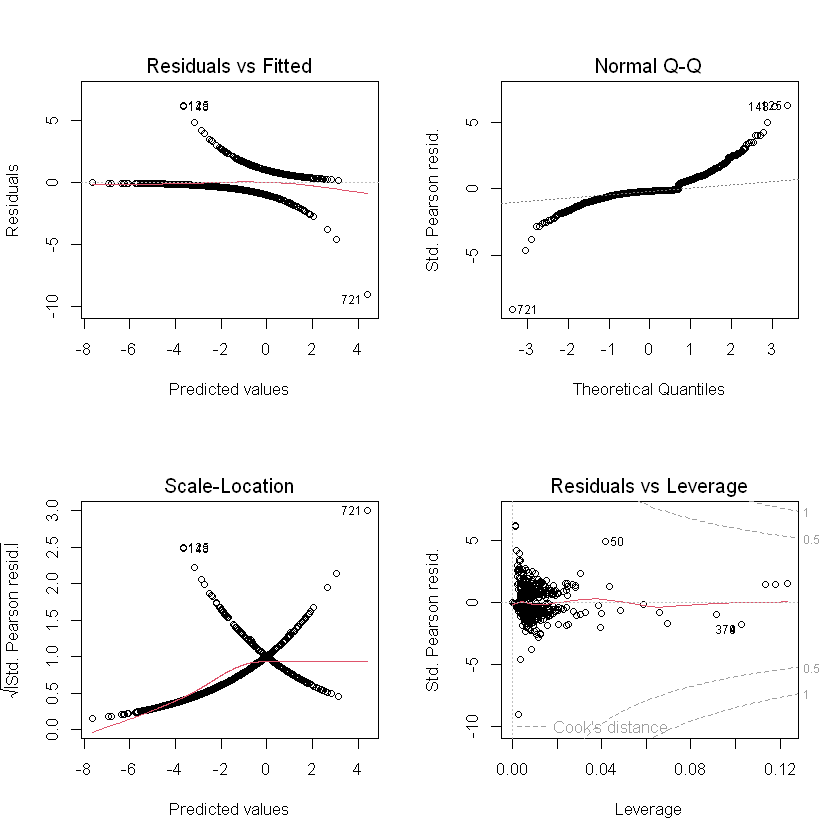

In [53]:
exp(coef(step_model_smote))

# 1. Set 2x2 layout
par(mfrow = c(2, 2))

# 2. Plot diagnostics
plot(step_model_smote)


## Logistic Regression Coefficient Interpretation (Odds Ratios)

| **Predictor**            | **Odds Ratio** | **Effect**           | **Interpretation** |
|--------------------------|----------------|-----------------------|---------------------|
| `volatile.acidity`       | 0.0386         | ❌ Strong Negative     | Each 1-unit increase in volatile acidity is associated with a **96.1% decrease** in the odds of high-quality wine. |
| `citric.acid`            | 3.8952         | ✅ Strong Positive     | Each 1-unit increase in citric acid increases the odds of high-quality wine by **~290%**. |
| `chlorides`              | 1.81e-6        | ❌ Extreme Negative    | Higher chloride levels almost **eliminate** the odds of high-quality wine. |
| `total.sulfur.dioxide`   | 0.9907         | Slight Negative        | Each 1-unit increase results in a **0.9% decrease** in odds of high-quality wine. |
| `pH`                     | 0.2079         | ❌ Moderate Negative   | Higher pH (less acidic) is associated with a **79.2% decrease** in odds of high-quality wine. |
| `sulphates`              | 26.5800        | ✅ Strong Positive     | Each 1-unit increase in sulphates increases the odds of high-quality wine by over **2500%**. |
| `alcohol`                | 2.9200         | ✅ Strong Positive     | Each 1-unit increase in alcohol content nearly **triples** the odds of high-quality wine (**+192%**). |

> ℹ️ **Note:** Odds ratios reflect multiplicative effects on the odds of high-quality wine, holding all other variables constant.


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



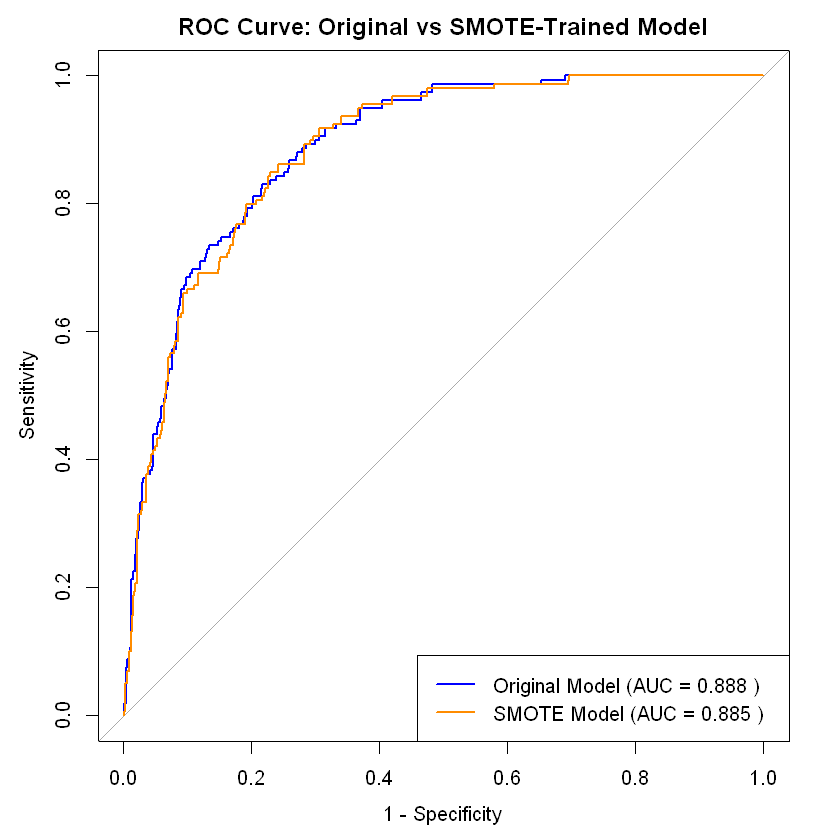

In [41]:
library(pROC)

# Ensure actual values are numeric (0/1)
actual <- as.numeric(as.character(data$high_quality))

# Predicted probabilities
probs_smote <- predict(step_model_smote, newdata = data, type = "response")
probs_orig <- predict(glm_model, newdata = data, type = "response")

# Create ROC objects
roc_smote <- roc(actual, probs_smote)
roc_orig <- roc(actual, probs_orig)

# Plot both
plot(roc_orig, col = "blue", lwd = 2, legacy.axes = TRUE,
     main = "ROC Curve: Original vs SMOTE-Trained Model")
lines(roc_smote, col = "darkorange", lwd = 2)

# Add legend
legend("bottomright", legend = c(
  paste("Original Model (AUC =", round(auc(roc_orig), 3), ")"),
  paste("SMOTE Model (AUC =", round(auc(roc_smote), 3), ")")
), col = c("blue", "darkorange"), lwd = 2)


In [42]:
# Predicted probabilities from SMOTE-trained model
probs_smote <- predict(step_model_smote, newdata = data, type = "response")

# Set a custom threshold (e.g., 0.35 for higher recall)
threshold <- 0.2135154
predicted_class <- ifelse(probs_smote > threshold, 1, 0)

# Convert actual labels to numeric if needed
actual <- as.numeric(as.character(data$high_quality))

# Combine predictions with original data
results <- cbind(data, predicted_class = predicted_class, predicted_prob = probs_smote, actual = actual)

# Extract false negatives: true = 1, predicted = 0
false_negatives <- subset(results, actual == 1 & predicted_class == 0)


# View top few false negatives
head(false_negatives,50)

# Optional: write to CSV
# write.csv(false_negatives, "false_negatives_smote_model.csv", row.names = FALSE)



,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Id,high_quality,density_combined,predicted_class,predicted_prob,actual
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
8,7.3,0.650,0.00,1.2,0.065,15,21,0.99460,3.39,0.47,10.00,7,7,1,0.027950,0,0.02516080,1
9,7.8,0.580,0.02,2.0,0.073,9,18,0.99680,3.36,0.57,9.50,7,8,1,0.616050,0,0.02557039,1
28,8.1,0.380,0.28,2.1,0.066,13,30,0.99680,3.23,0.73,9.70,7,37,1,0.721560,0,0.15282570,1
199,8.9,0.400,0.32,5.6,0.087,10,47,0.99910,3.38,0.77,10.50,7,279,1,0.871000,0,0.19667181,1
201,7.7,0.270,0.68,3.5,0.358,5,10,0.99720,3.25,1.08,9.90,7,281,1,0.350020,0,0.04093313,1
202,8.9,0.400,0.32,5.6,0.087,10,47,0.99910,3.38,0.77,10.50,7,283,1,0.871000,0,0.19667181,1
207,8.7,0.520,0.09,2.5,0.091,20,49,0.99760,3.34,0.86,10.60,7,288,1,0.685230,0,0.15228595,1
209,8.7,0.520,0.09,2.5,0.091,20,49,0.99760,3.34,0.86,10.60,7,290,1,0.685230,0,0.15228595,1
228,9.8,0.660,0.39,3.2,0.083,21,59,0.99890,3.37,0.71,11.50,7,318,1,0.989650,0,0.20967925,1


459            0.38841  
720            0.05320  
89             0.25765  
724            0.05320  
1067          -0.58540  
**639**          -0.70856  
12             0.59840  
7              0.02795  
704           -1.69796  
162           -2.49154  
676           -1.22851  
654            0.41920  